# Quick Draw Project Data Processing

In [3]:
import os
import csv
import time
import json
import gzip

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

In [4]:
# Retrieve all the csv file names
data_path = './data/'
training_path = './data/train_simplified/'
training_files = []
for path in os.listdir(training_path):
    if path.endswith('.csv'):
        training_files.append(path)

In [5]:
def load_image_csv(file):
    """
    Reads a specific image csv file from the file name.
    Uses Python built-in csv library with no dependencies.
    
    file: file name with full directory
    
    returns: full list of lists with all the data from the csv file
    """
    result = []
    with open(file) as csvfile:
        current = csv.reader(csvfile)
        for row in current:
            result.append(row)
    
    return result

In [6]:
def load_data(quant):
    """
    Reads in all the data directly from the csv files. 
    
    quant: indicates the amount of data going to be stored and returned
            0 ~ 1 would be the proportion of data
            >= 1 would be the number of rows from each file
            
    returns: dictionary of {word: stroke_list}
    """
    
    all_images = {}

    for file in tqdm(training_files):
        name = file.split('.')[0]
        current = pd.read_csv(training_path + file)
        
        if quant >= 1:
            count = quant
        else:
            count = int(len(current) * quant)
            
        current = current[:count]
        current = current.values.tolist()
        all_images[name] = current
    
    return all_images

In [7]:
# Stores data in Json file. 10 percent of training data would be around 2.5GB. 
def json_store(file, data):
    with open(file, 'w') as f:
        json.dump(data, f)

# Loads data from Json file. 
def json_load(file):
    with open(file, 'r') as f:
        result = json.load(f)
    return result

In [8]:
def show_image(strokes):
    """
    Takes the list of strokes as input and shows the image with matplotlib
    """
    point_sets = []
    
    # Separate the strokes and stores the points in different arrays
    for stroke in strokes:
        current = []
        for x,y in zip(stroke[0], stroke[1]):
            current.append([x,255-y])  # Subtracting from 255 as images appear to be inverted
        current = np.array(current)
        point_sets.append(current)
    
    # Shows the image on a canvas with size 256*256
    # The fixed size is to regulate the shown image
    plt.plot([0,0,255,255,0], [0,255,255,0,0], '#999999')  # Grey border
    for group in point_sets:
        plt.plot(group[:,0], group[:,1], 'k-')  # Each stroke
    plt.xlim((0, 255))
    plt.ylim((0, 255))
    plt.axis('scaled')
    plt.axis('off')
    plt.show()


In [53]:
# Loads 1000 rows from each file. 
if input('y to confirm load') == 'y':
    data_1000 = load_data(1000)
    json_store(data_path + 'data_1000.json', data_1000)

y to confirm load 


In [9]:
data_1000 = json_load(data_path + 'data_1000.json')

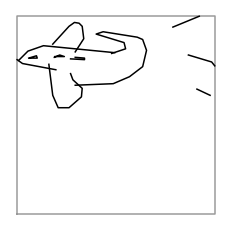

In [8]:
sample_image = data_1000['airplane'][1][1]
sample_image = eval(sample_image)
show_image(sample_image)

In [25]:
with open('./data/test_1000.gz', 'wb') as f:
    for x in data_1000.keys():
        count = 0
        for item in data_1000[x]:
            if count > 10:
                continue
            sketch = item[1]
            binary = ''.join(format(i, '08b') for i in bytearray(x+sketch, encoding ='utf-8'))
            f.write(binary)
            count += 1

TypeError: a bytes-like object is required, not 'str'

In [21]:
s = data_1000['airplane'][0][1]

In [22]:
res = ''.join(format(i, '08b') for i in bytearray(s, encoding ='utf-8'))

In [ ]:
print(b('a'))